In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [ ]:
!yolo detect train data=/content/drive/MyDrive/Neura/dataset/dataset.yaml model=yolov8n.pt epochs=100 imgsz=640 batch=16


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Neura/dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

Checking if image exists: True
Successfully loaded image with shape: (480, 640, 3)

0: 480x640 4 medium_boxs, 20 small_boxs, 46.4ms
Speed: 1.7ms preprocess, 46.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


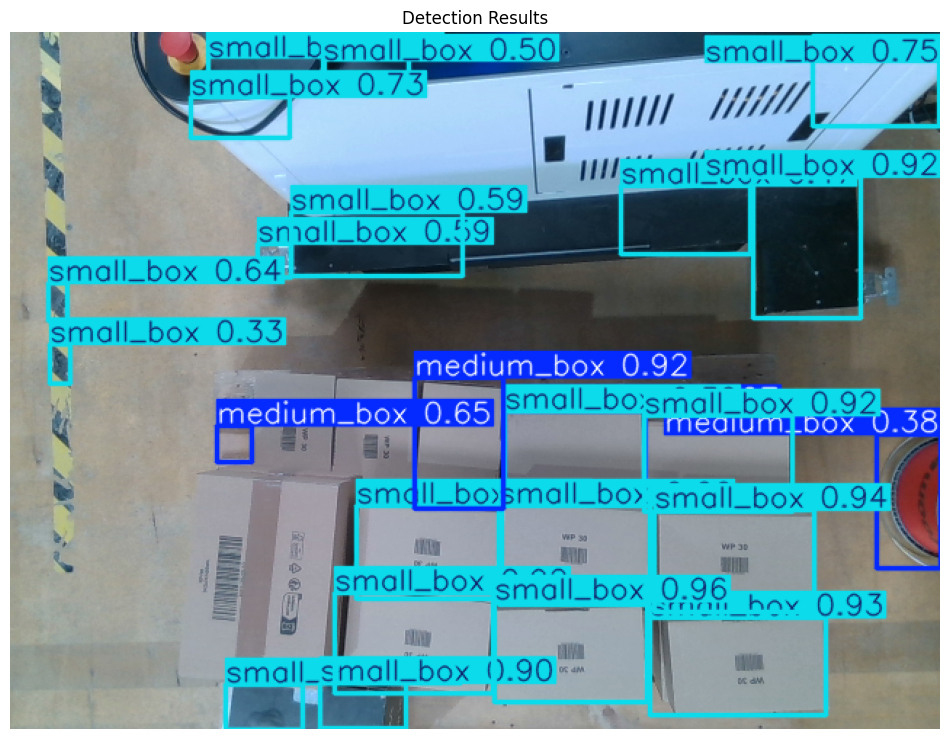

Detected: small_box with confidence 0.96
Detected: small_box with confidence 0.94
Detected: small_box with confidence 0.93
Detected: small_box with confidence 0.92
Detected: medium_box with confidence 0.92
Detected: small_box with confidence 0.92
Detected: small_box with confidence 0.92
Detected: small_box with confidence 0.90
Detected: small_box with confidence 0.79
Detected: small_box with confidence 0.75
Detected: small_box with confidence 0.73
Detected: small_box with confidence 0.66
Detected: medium_box with confidence 0.65
Detected: small_box with confidence 0.64
Detected: small_box with confidence 0.59
Detected: small_box with confidence 0.59
Detected: small_box with confidence 0.50
Detected: small_box with confidence 0.49
Detected: small_box with confidence 0.47
Detected: medium_box with confidence 0.38
Detected: small_box with confidence 0.33
Detected: small_box with confidence 0.30
Detected: medium_box with confidence 0.27
Detected: small_box with confidence 0.25


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load your trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Check image path and load image
img_path = "/content/drive/MyDrive/Neura/color_image.png"
print(f"Checking if image exists: {os.path.exists(img_path)}")

# Load image and verify it's not None
img = cv2.imread(img_path)

results = model(source=img)

# Visualize results
result_img = results[0].plot()
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detection Results")
plt.show()

# Print detection details
for box in results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    class_name = model.names[cls]
    print(f"Detected: {class_name} with confidence {conf:.2f}")
